In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Early stoping

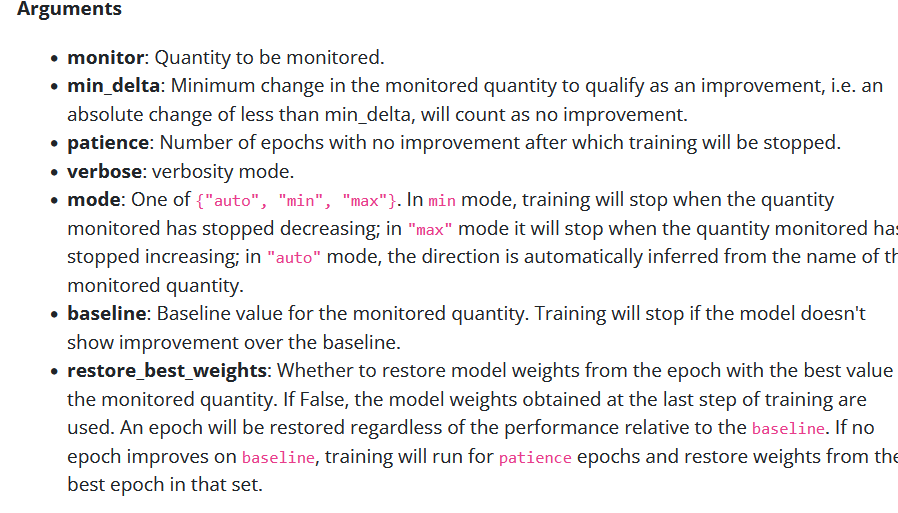

In [4]:
early_stopping = EarlyStopping(patience=2, monitor='val_loss',mode='min', baseline=0.7)

In [5]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train, validation_split=0.2, epochs=10, 
                    callbacks=[early_stopping])



Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4823 - accuracy: 0.8253 - val_loss: 0.4112 - val_accuracy: 0.8472
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3614 - accuracy: 0.8669 - val_loss: 0.3609 - val_accuracy: 0.8703
Epoch 3/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3284 - accuracy: 0.8785 - val_loss: 0.3674 - val_accuracy: 0.8654
Epoch 4/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3002 - accuracy: 0.8869 - val_loss: 0.3204 - val_accuracy: 0.8802
Epoch 5/10
1500/1500 [==============================] - 11s 8ms/step - loss: 0.2828 - accuracy: 0.8930 - val_loss: 0.3419 - val_accuracy: 0.8806
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2679 - accuracy: 0.8994 - val_loss: 0.3264 - val_accuracy: 0.8846


In [7]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

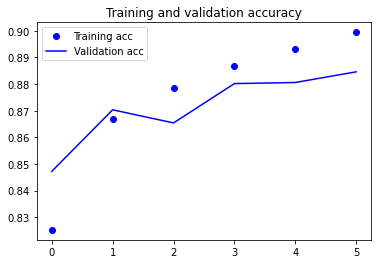

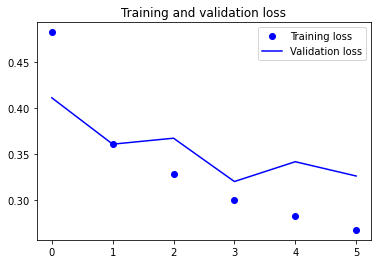

In [8]:
plot_history(history2)